<a href="https://colab.research.google.com/github/AhmedQassemDev2004/Calefornia-House-Pricing/blob/main/Calefornia_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ! pip install kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d camnugent/california-housing-prices
# !unzip california-housing-prices.zip

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


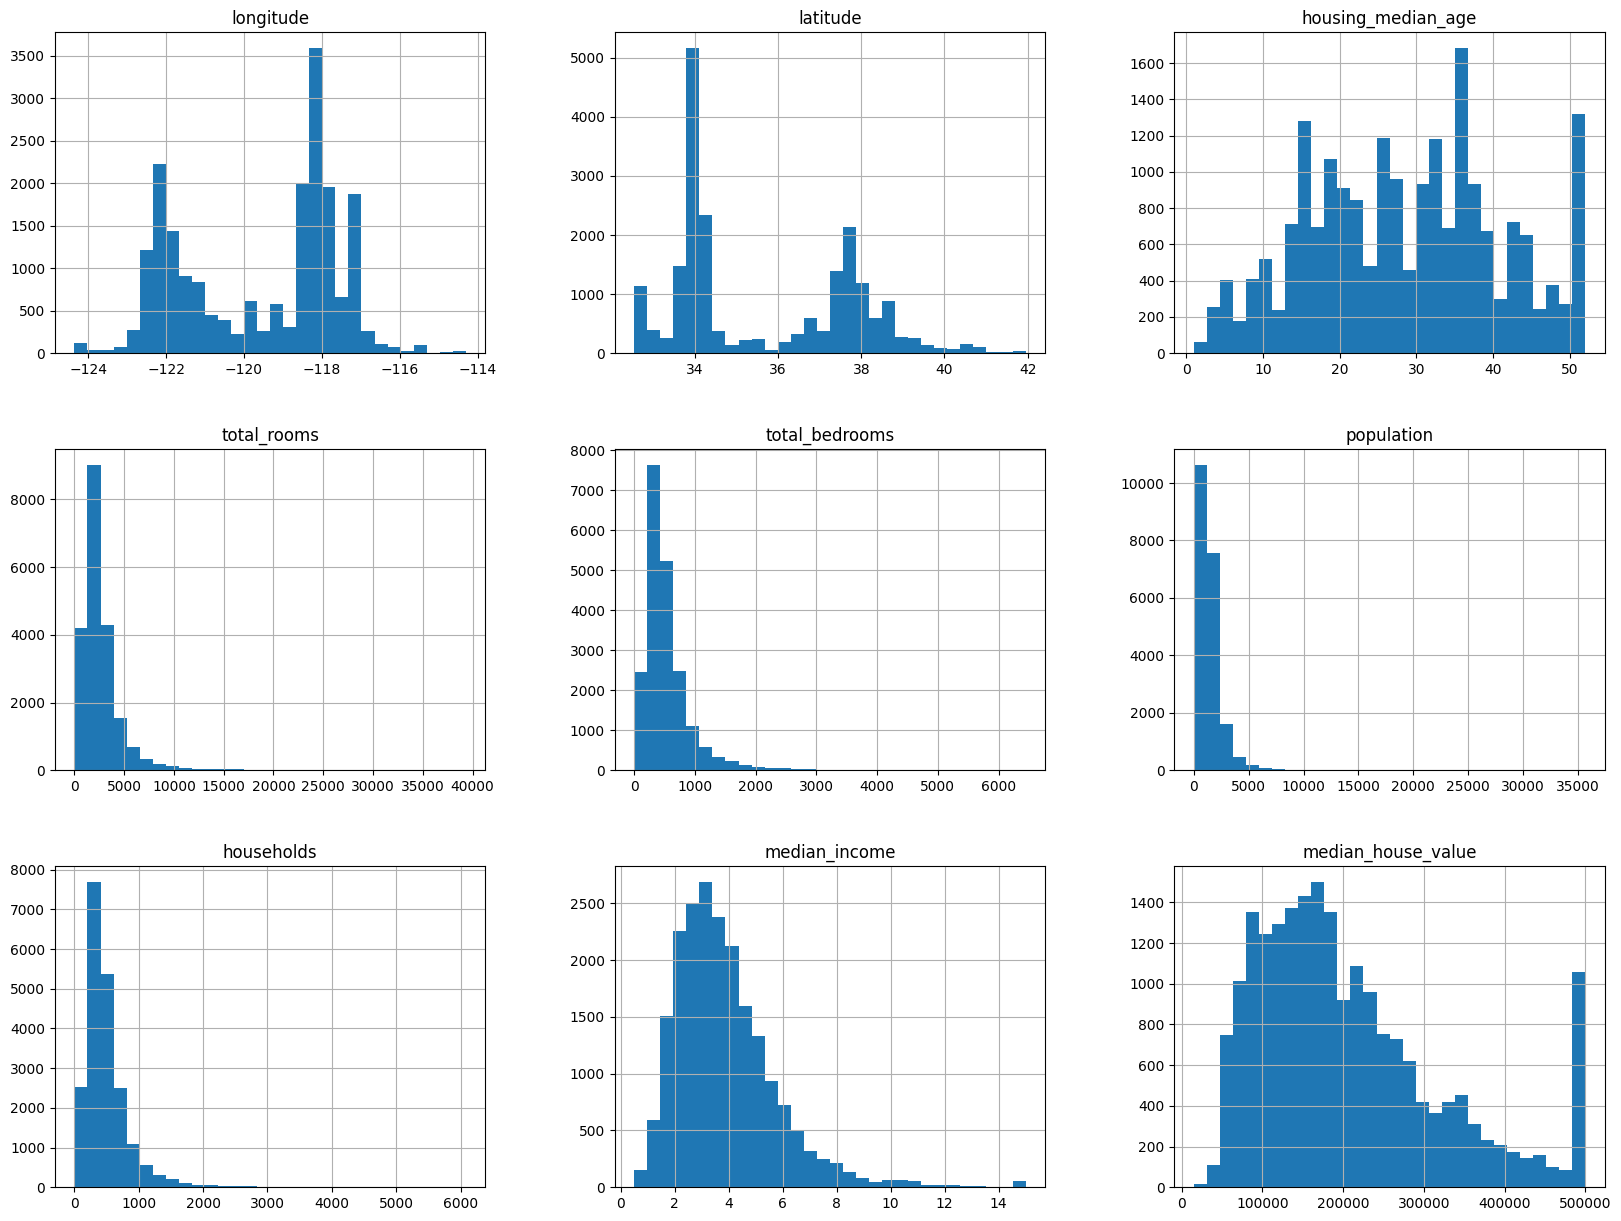

In [7]:
df.hist(bins=30, figsize=(20,15))
plt.show()

In [8]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


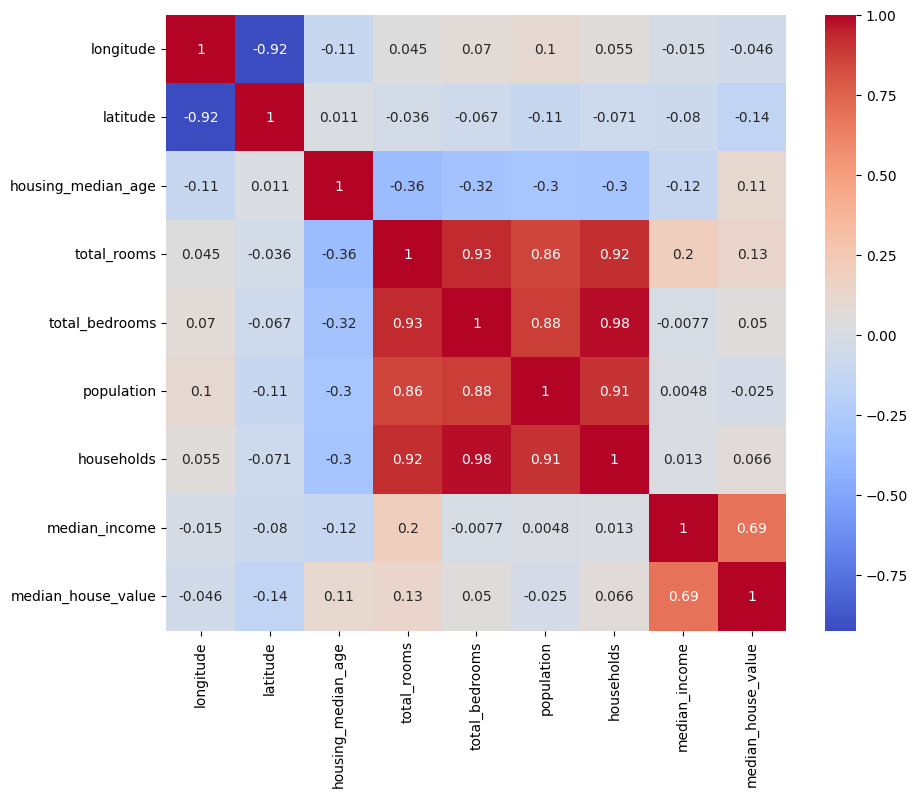

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [10]:
# Combine the most correlated features into one feature
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df['location'] = df['longitude'] + df['latitude']
df = df.drop(columns=['total_bedrooms', 'population', 'households', 'total_rooms', 'longitude', 'latitude'])
df

,housing_median_age,median_income,median_house_value,ocean_proximity,bedrooms_per_room,population_per_household,location
0,41.0,8.3252,452600.0,NEAR BAY,0.146591,2.555556,-84.35
1,21.0,8.3014,358500.0,NEAR BAY,0.155797,2.109842,-84.36
2,52.0,7.2574,352100.0,NEAR BAY,0.129516,2.802260,-84.39
3,52.0,5.6431,341300.0,NEAR BAY,0.184458,2.547945,-84.40
4,52.0,3.8462,342200.0,NEAR BAY,0.172096,2.181467,-84.40
...,...,...,...,...,...,...,...
20635,25.0,1.5603,78100.0,INLAND,0.224625,2.560606,-81.61
20636,18.0,2.5568,77100.0,INLAND,0.215208,3.122807,-81.72
20637,17.0,1.7000,92300.0,INLAND,0.215173,2.325635,-81.79
20638,18.0,1.8672,84700.0,INLAND,0.219892,2.123209,-81.89


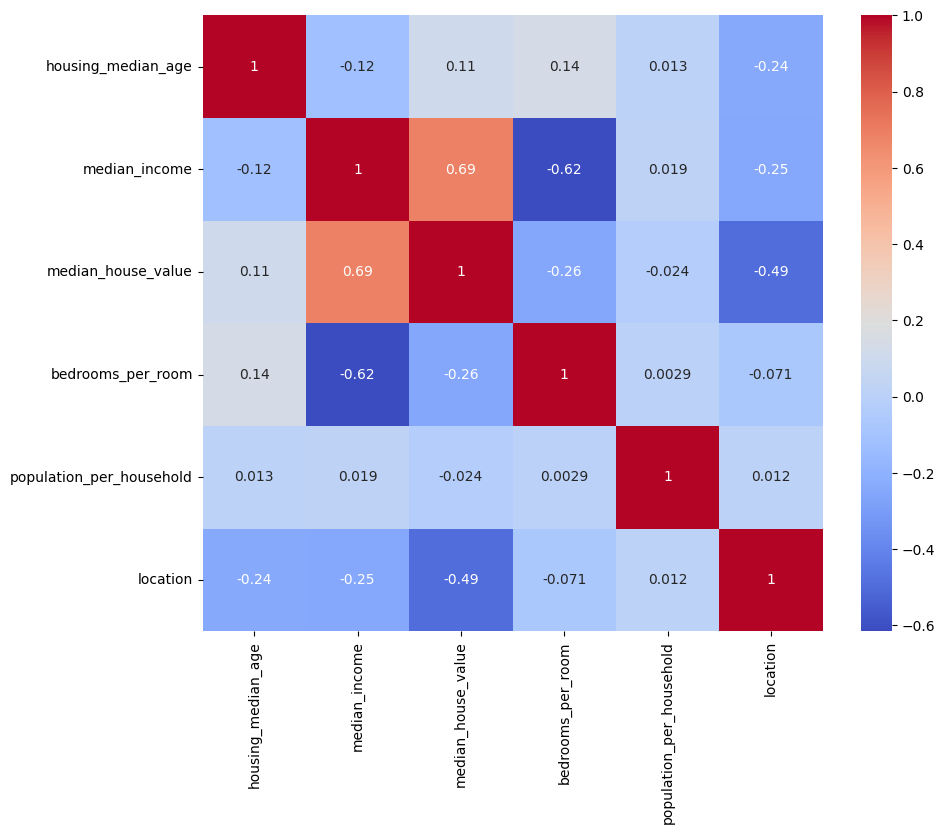

In [11]:
corr_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

/tmp/ipython-input-12-2595303757.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette='coolwarm')


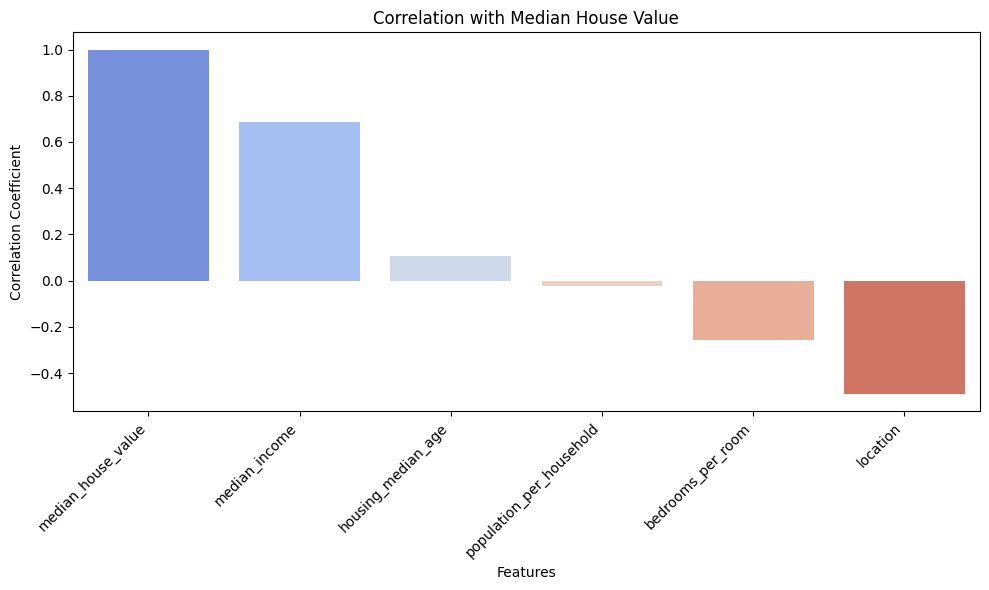

In [12]:
corr_with_target = corr_matrix['median_house_value'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation with Median House Value')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

## Data Cleaning & Pre-Processing

In [13]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

numerical_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

log_transformation = FunctionTransformer(lambda x: np.log1p(x), validate=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_preprocessed = preprocessing_pipeline.fit_transform(X)

print("Shape of preprocessed data:", X_preprocessed.shape)

Shape of preprocessed data: (20640, 10)


In [14]:
num_feature_names = numerical_features.tolist()
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# changing it's name cuz it gettings errors in the future with XGBRegressor1
cat_feature_names = [name.replace('ocean_proximity_<1H OCEAN', 'ocean_proximity_1H_OCEAN') if 'ocean_proximity_<1H OCEAN' in name else name for name in cat_feature_names]

all_feature_names = num_feature_names + list(cat_feature_names)

X_preprocessed_df = pd.DataFrame(data=X_preprocessed, columns=all_feature_names)


## Model Training And Selection

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
    'lr': LinearRegression(),
    'rf': RandomForestRegressor(random_state=42),
    'xgb': XGBRegressor(random_state=42)
}

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

In [18]:
results = {}
for name, model in models.items():
  rmse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
  results[name] = {'rmse':rmse, 'r2':r2}
  print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")

lr: RMSE = 72089.02, R² = 0.60
rf: RMSE = 54067.22, R² = 0.78
xgb: RMSE = 54445.88, R² = 0.77


In [19]:
# hyper params tuining
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5]}
grid_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_iter=15, verbose=2)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
rmse, r2 = evaluate_model(best_rf, X_train, X_test, y_train, y_test)
print(f"Optimized Random Forest: RMSE = {rmse:.2f}, R² = {r2:.2f}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  12.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  12.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  11.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  12.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  11.5s
[CV] END max_depth=30, min_samples_split=5, n_estimators=300; total time=  28.9s
[CV] END max_depth=30, min_samples_split=5, n_estimators=300; total time=  27.9s
[CV] END max_depth=30, min_samples_split=5, n_estimators=300; total time=  28.0s
[CV] END max_depth=30, min_samples_split=5, n_estimators=300; total time=  28.6s
[CV] END max_depth=30, min_samples_split=5, n_estimators=300; total time=  28.0s
[CV] END max_depth=30, min_samples_split=5, n_estimators=200; total time=  19.1s
[CV] END max_depth=30, min_samples_split=5, n_es

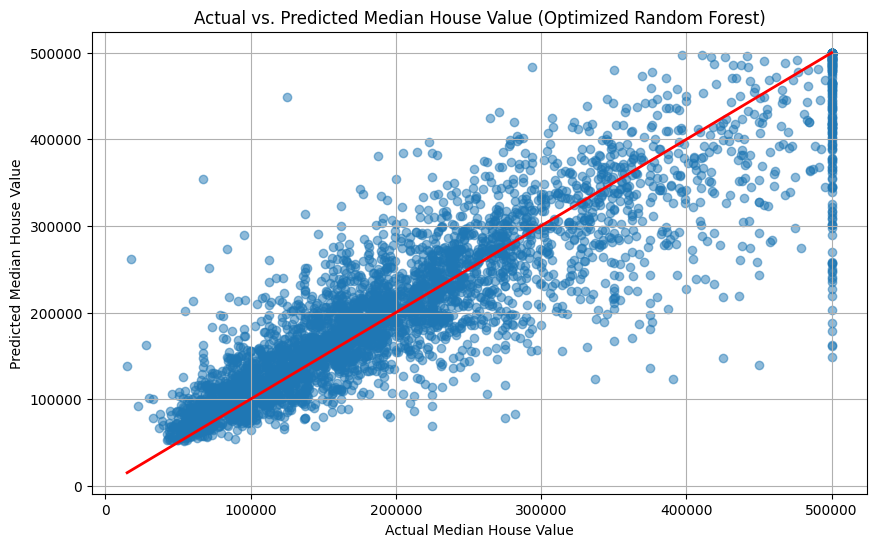

In [25]:
y_pred = best_rf.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
## plot the perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, c='red')
plt.title("Actual vs. Predicted Median House Value (Optimized Random Forest)")
plt.grid(True)
plt.show()